# 🚚 Food Delivery Time Prediction: Case Study

## 📝 Problem Statement
Food delivery companies like Zomato and Swiggy want to predict how much time it will take for food to reach customers. The best way is to use previous delivery data — especially the distance traveled — to predict the delivery time.

This case study uses a dataset submitted on Kaggle (cleaned version) with features like:
- Delivery person's age, ratings
- Latitude/longitude of restaurant and delivery location
- Type of order and vehicle
- Actual delivery time (target variable)

We'll apply machine learning to build a predictive model.


## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 2. Load Dataset

In [4]:
# Load your CSV file
df = pd.read_csv('food_delivery_data.csv')  
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [6]:
df.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26
45592,0x5fb2,RANCHIRES09DEL02,23,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10:00,17:15:00,conditions Fog,Medium,2,Snack,scooter,1,No,Metropolitian,(min) 36


## 3. Exploratory Data Analysis (EDA)

In [9]:
df.shape

(45593, 20)

In [11]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [15]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [19]:
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

In [21]:
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


## 4. Encoding Categorical Features & Data Cleaning

In [28]:
# Convert Age and Ratings
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')

# Remove ' (min)' from Time_taken(min) and convert to numeric
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace('(min)', '', regex=False)
df['Time_taken(min)'] = pd.to_numeric(df['Time_taken(min)'], errors='coerce')


In [29]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y', errors='coerce')
df['order_day'] = df['Order_Date'].dt.day
df['order_month'] = df['Order_Date'].dt.month
df['order_weekday'] = df['Order_Date'].dt.weekday
df.drop(columns=['Order_Date'], inplace=True)


In [32]:
# Convert to datetime
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%I:%M %p', errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%I:%M %p', errors='coerce')

# Extract hour and minute
df['order_hour'] = df['Time_Orderd'].dt.hour
df['order_minute'] = df['Time_Orderd'].dt.minute
df['pickup_hour'] = df['Time_Order_picked'].dt.hour
df['pickup_minute'] = df['Time_Order_picked'].dt.minute

# Drop original time columns
df.drop(columns=['Time_Orderd', 'Time_Order_picked'], inplace=True)


In [34]:
# Use separate encoders
le_order = LabelEncoder()
le_vehicle = LabelEncoder()

df['Type_of_order'] = le_order.fit_transform(df['Type_of_order'])
df['Type_of_vehicle'] = le_vehicle.fit_transform(df['Type_of_vehicle'])

# For other columns, you can use a loop with a dictionary
other_cats = ['Weatherconditions', 'Road_traffic_density',
              'multiple_deliveries', 'Festival', 'City']

label_encoders = {}  # dictionary to save them

for col in other_cats:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # store for later use if needed


In [36]:
df= df.drop(columns=['ID', 'Delivery_person_ID'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43739 non-null  float64
 1   Delivery_person_Ratings      43685 non-null  float64
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Weatherconditions            45593 non-null  int32  
 7   Road_traffic_density         45593 non-null  int32  
 8   Vehicle_condition            45593 non-null  int64  
 9   Type_of_order                45593 non-null  int32  
 10  Type_of_vehicle              45593 non-null  int32  
 11  multiple_deliveries          45593 non-null  int32  
 12  Festival                     45593 non-null  int32  
 13  City            

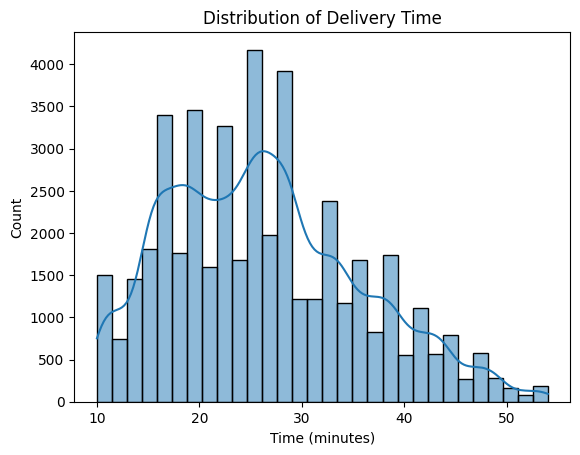

In [40]:
sns.histplot(df['Time_taken(min)'], bins=30, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Time (minutes)')
plt.show()

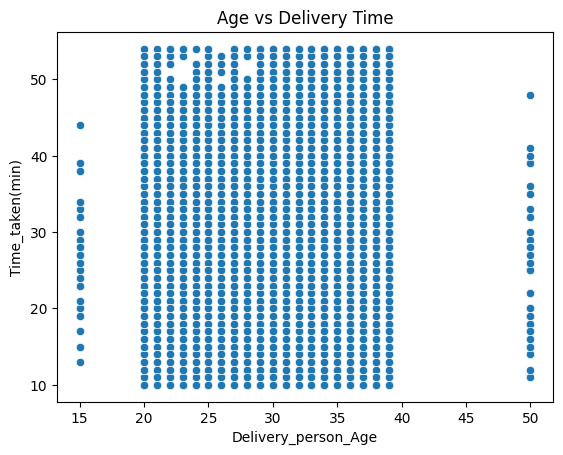

In [43]:
sns.scatterplot(x='Delivery_person_Age', y='Time_taken(min)', data=df)
plt.title('Age vs Delivery Time')
plt.show()

## 5. Feature Engineering

In [46]:

def haversine(lat1, lon1, lat2, lon2):
    # Converts degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # Radius of Earth in kilometers
    return km

df['distance_km'] = haversine(
    df['Restaurant_latitude'], df['Restaurant_longitude'],
    df['Delivery_location_latitude'], df['Delivery_location_longitude']
)

df[['distance_km', 'Time_taken(min)']].head()


,distance_km,Time_taken(min)
0,3.025149,24
1,20.183530,33
2,1.552758,26
3,7.790401,21
4,6.210138,30


In [48]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'order_day', 'order_month', 'order_weekday',
       'order_hour', 'order_minute', 'pickup_hour', 'pickup_minute',
       'distance_km'],
      dtype='object')

## 6. Train/Test Split

In [51]:
# Encoding Categorical Features & Data Cleaning
# Selecting relevant features
features = ['distance_km', 'Delivery_person_Age', 'Delivery_person_Ratings', 
            'Type_of_order', 'Type_of_vehicle']

target = 'Time_taken(min)'

# Fill missing values (if any)
df[features] = df[features].fillna(df[features].median())


In [53]:
X = df[features]
y = df[target]

# Scale features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [55]:
X

,distance_km,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle
0,3.025149,37.0,4.9,3,2
1,20.183530,34.0,4.5,3,3
2,1.552758,23.0,4.4,1,2
3,7.790401,38.0,4.7,0,2
4,6.210138,32.0,4.6,3,3
...,...,...,...,...,...
45588,1.489846,30.0,4.8,2,2
45589,11.007735,21.0,4.6,0,2
45590,4.657195,30.0,4.9,1,3
45591,6.232393,20.0,4.7,3,2


In [57]:
y

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int64

In [59]:
#Train a Machine Learning Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf

RandomForestRegressor(random_state=42)

## 7. Evaluate Models

In [62]:
# Evaluate the Model
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


MAE: 6.06
RMSE: 7.75
R-squared: 0.32


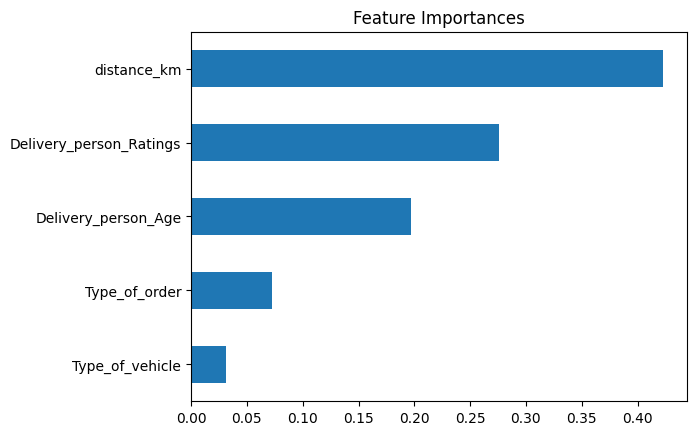

In [64]:
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values()
feat_importance.plot(kind='barh')
plt.title('Feature Importances')
plt.show()


In [66]:
# Example: Make sure these labels existed in training data
print("Order classes:", le_order.classes_)
print("Vehicle classes:", le_vehicle.classes_)


Order classes: ['Buffet ' 'Drinks ' 'Meal ' 'Snack ']
Vehicle classes: ['bicycle ' 'electric_scooter ' 'motorcycle ' 'scooter ']


In [68]:
print("Order Mapping:", dict(zip(le_order.classes_, le_order.transform(le_order.classes_))))
print("Vehicle Mapping:", dict(zip(le_vehicle.classes_, le_vehicle.transform(le_vehicle.classes_))))


Order Mapping: {'Buffet ': 0, 'Drinks ': 1, 'Meal ': 2, 'Snack ': 3}
Vehicle Mapping: {'bicycle ': 0, 'electric_scooter ': 1, 'motorcycle ': 2, 'scooter ': 3}


## 8. Predict on New Data

In [71]:
new_order = pd.DataFrame({
    'distance_km': [5.2],                   # example values
    'Delivery_person_Age': [28],
    'Delivery_person_Ratings': [4.9],
    'Type_of_order': le_order.transform(['Snack ']),      # example string
    'Type_of_vehicle': le_vehicle.transform(['electric_scooter '])
})

new_order_scaled = scaler.transform(new_order)
pred_time = rf.predict(new_order_scaled)
print(f"Predicted Delivery Time: {pred_time[0]:.2f} minutes")


Predicted Delivery Time: 17.19 minutes


In [122]:
new_order = pd.DataFrame({
    'distance_km': [2],                   # example values
    'Delivery_person_Age': [30],
    'Delivery_person_Ratings': [4.5],
    'Type_of_order': le_order.transform(['Meal ']),      # example string
    'Type_of_vehicle': le_vehicle.transform(['motorcycle '])
})

new_order_scaled = scaler.transform(new_order)
pred_time = rf.predict(new_order_scaled)
print(f"Predicted Delivery Time: {pred_time[0]:.2f} minutes")


Predicted Delivery Time: 27.59 minutes


##  Conclusion

- We successfully predicted delivery time using a Random Forest model.
- Distance was the strongest predictor of delivery time.
- Encoded categorical features and extracted time-based variables improved performance.
- This project is ideal for real-world delivery logistics optimization.
